In [1]:
using PyPlot

In [2]:
using EMD
using Splines

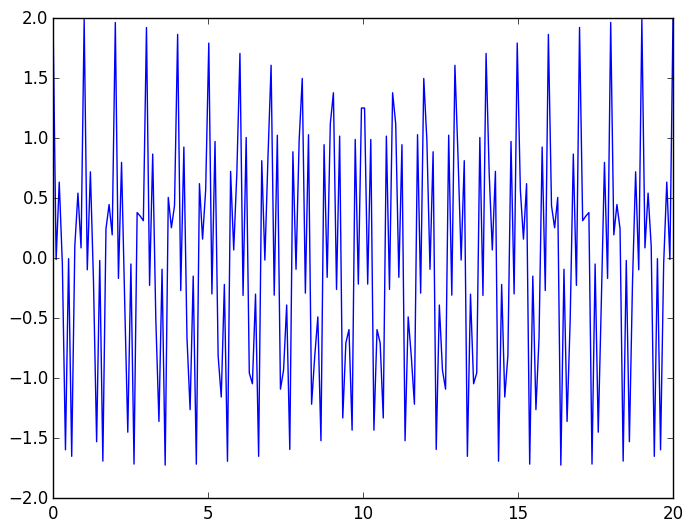

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbeb8095a90>

In [3]:
t = [linspace(0,20,200);]
y = cos(2pi*t) + cos(8pi*t)
plot(t,y)

800.6448143171235
0.015351083987170371
8.069686299413094
-0.004338208312210725
0.014338208312210743


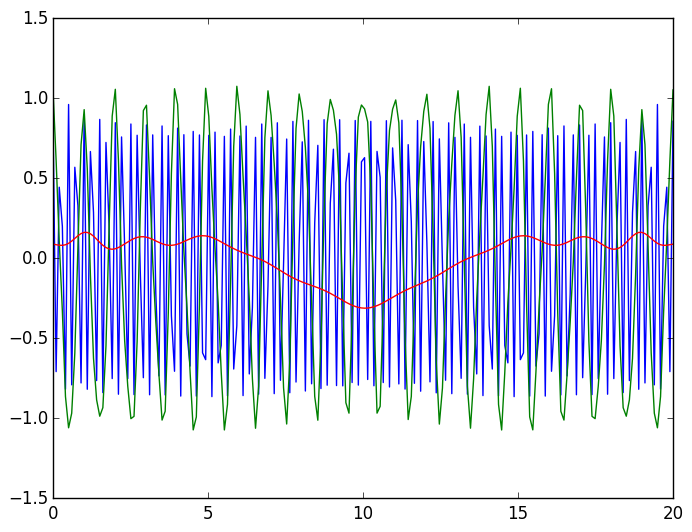

In [7]:
N = 2
order = 10
n = length(y)
tol = 0.3

f = IMF(y,t, tol, order, N)

plot(t,f[:,1])
plot(t, f[:,2], color="green")
plot(t, y-f[:,1]-f[:,2], color="red")
println(mean(f[:,1]))
println(mean(y-f[:,1]))

t = [0.0,0.10050251256281408,0.20100502512562815,0.3015075376884422,0.4020100502512563,0.5025125628140703,0.6030150753768844,0.7035175879396985,0.8040201005025126,0.9045226130653267,1.0050251256281406,1.1055276381909547,1.2060301507537687,1.306532663316583,1.407035175879397,1.5075376884422111,1.6080402010050252,1.7085427135678393,1.8090452261306533,1.9095477386934674,2.0100502512562812,2.1105527638190953,2.2110552763819094,2.3115577889447234,2.4120603015075375,2.512562814070352,2.613065326633166,2.71356783919598,2.814070351758794,2.9145728643216082,3.0150753768844223,3.1155778894472363,3.2160804020100504,3.3165829145728645,3.4170854271356785,3.5175879396984926,3.6180904522613067,3.7185929648241207,3.819095477386935,3.919597989949749,4.0201005025125625,4.1206030150753765,4.221105527638191,4.321608040201005,4.422110552763819,4.522613065326633,4.623115577889447,4.723618090452261,4.824120603015075,4.924623115577889,5.025125628140704,5.125628140703518,5.226130653266332,5.326633165829146,5.4

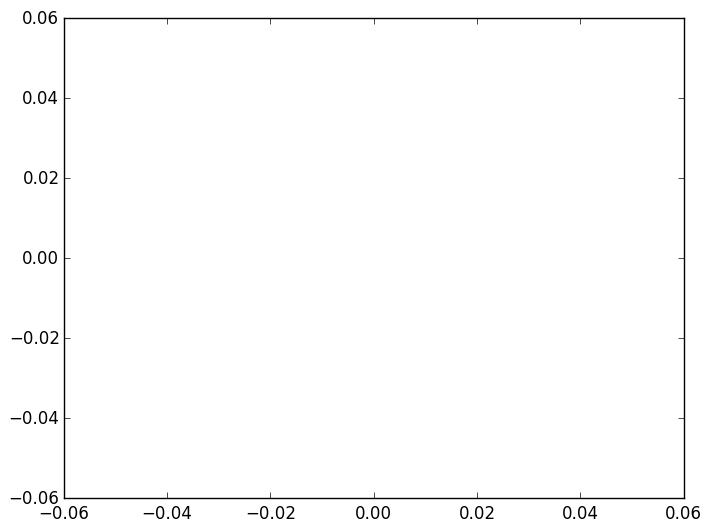

In [16]:
# calculate instantaneous frequency

x=t
for i =1:N
    H1 = Spline(f[:,i], t, 4)
    phi = 1/(2pi)*(H1(x).*H1(x,1,true) - H1(x, 1).*H1(x,0,true))./(H1(x).^2 + H1(x,0,true).^2)
    plot(x,H1(x,0,true))
    #@show(H1(x))
    @show(t)
end
